# **`Naïve Bayes (Titanic Data) Survival Prediction`**

**What is Naive Bayes algorithm?**


`It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.`

`For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the` probability that this fruit is an apple and that is why it is known as ‘Naive’.

`Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.`

`Bayes theorem provides a way of calculating posterior probability P(class|data) from P(ciass), P(data) and P(data|class). Look at the equation below:`


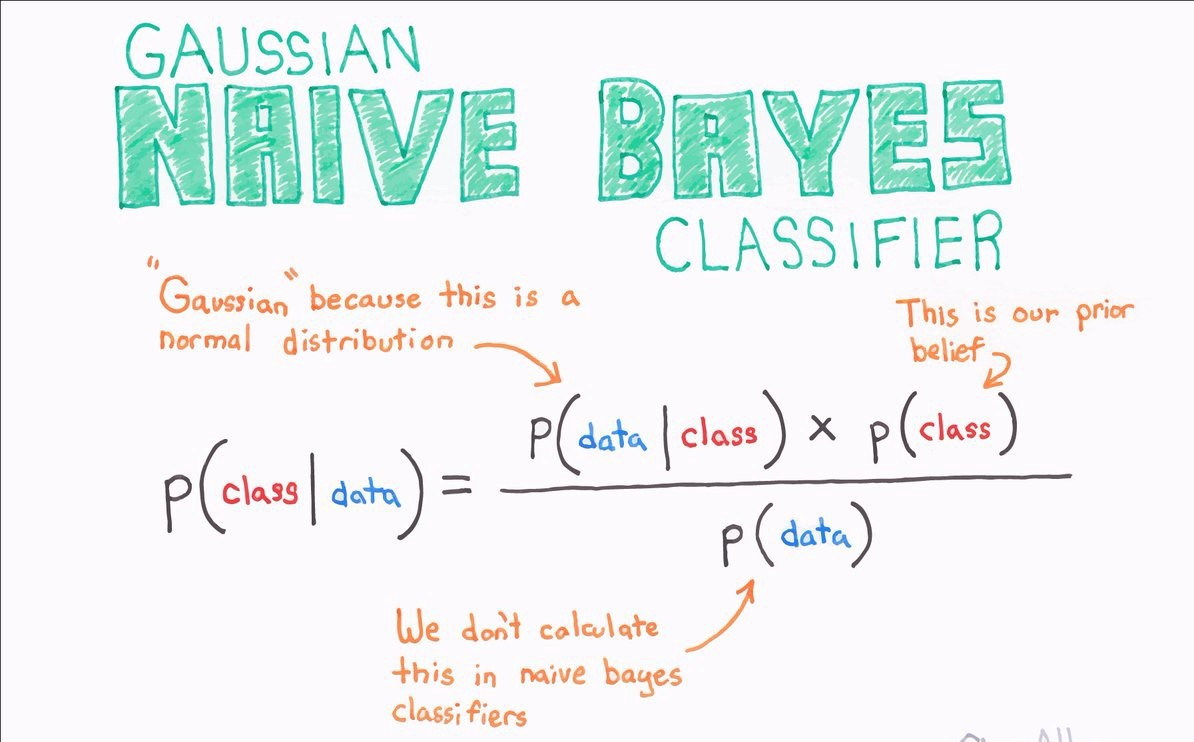

**Above:**

`-> P(class|data) is the posterior probability of class (class, target) given predictor (data, attributes).`


`-> P(ciass) is the prior probability of class.`


`-> P(data|class) is the likelihood which is the probability of predictor 
given class.`



`-> P(data) is the prior probability of predictor.`

**To upload `.csv` file from my local drive:**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_Data.csv to Titanic_Data (1).csv


**To import it into a `dataframe` (make sure the filename matches the name of the uploaded file).**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

import io
df = pd.read_csv(io.BytesIO(uploaded['Titanic_Data.csv']))
# print(df)

pd.set_option('display.max_columns', None)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Clear the Data frame:**

My only useable Columns are: `Survived`; `Pclass`; `Sex`; `Age`; `Fare`;. So, drop all columns except above 5 columns.

In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


**Prepare `inputs` Data:**

In [ ]:
# Clear_Data.drop(['Survived'])
inputs = df.drop('Survived',axis='columns')
inputs.head(10)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
5,3,male,NaN,8.4583
6,1,male,54.0,51.8625
7,3,male,2.0,21.0750
8,3,female,27.0,11.1333
9,2,female,14.0,30.0708


**Clean `Age` column. Because `Age` column contain `NaN` values. And show ALL `NaN` valu of Age column:**

In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

See `NaN` Data:

In [ ]:
# df1 = inputs[inputs.isna().any(axis=1)]

NaN_Age = inputs.loc[inputs['Age'].isnull()]
NaN_Age.head(10)

,Pclass,Sex,Age,Fare
5,3,male,NaN,8.4583
17,2,male,NaN,13.0000
19,3,female,NaN,7.2250
26,3,male,NaN,7.2250
28,3,female,NaN,7.8792
29,3,male,NaN,7.8958
31,1,female,NaN,146.5208
32,3,female,NaN,7.7500
36,3,male,NaN,7.2292
42,3,male,NaN,7.8958


**Replace `NaN` by `mean()` value of `Age`:**

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

**Now `inputs` data is clean:**

In [ ]:
inputs.head(10)

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
5,3,male,29.699118,8.4583
6,1,male,54.000000,51.8625
7,3,male,2.000000,21.0750
8,3,female,27.000000,11.1333
9,2,female,14.000000,30.0708


**Now replace `Sex` `male=1`; `female=2`;**

In [ ]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.head(10)

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
5,3,1,29.699118,8.4583
6,1,1,54.000000,51.8625
7,3,1,2.000000,21.0750
8,3,2,27.000000,11.1333
9,2,2,14.000000,30.0708


**Prepare `target` Data:**

In [ ]:
target = df.Survived
target.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


**Splite data for `training` and `testing` purpose (20%):**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

**Size of `train` & `testing` Data:**

In [ ]:
print(f"Length of X_test Data: {len(X_test)}")

print(f"Length of X_train Data: {len(X_train)}")

Length of X_test Data: 179
Length of X_train Data: 712


**Create `Gaussian Naïve Bayes` Model:**

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

**`Train` the Model through Splite Data:**

In [ ]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**TEST-01 / (Prediction-01):**

In [ ]:
X_test[0:10]

,Pclass,Sex,Age,Fare
397,2,1,46.000000,26.0000
495,3,1,29.699118,14.4583
254,3,2,41.000000,20.2125
589,3,1,29.699118,8.0500
353,3,1,25.000000,17.8000
376,3,2,22.000000,7.2500
854,2,2,44.000000,26.0000
360,3,1,40.000000,27.9000
218,1,2,32.000000,76.2917
53,2,2,29.000000,26.0000


In [ ]:
y_test[0:10]

697    1
683    0
322    1
199    0
433    0
431    1
308    0
759    1
314    0
222    0
Name: Survived, dtype: int64

**`O/P:`**

In [ ]:
model.predict(X_test[0:10])

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

**O/P `Predict Probability`:**

In [ ]:
model.predict_proba(X_test[:10])

array([[0.91727597, 0.08272403],
       [0.97017879, 0.02982121],
       [0.41473071, 0.58526929],
       [0.96983863, 0.03016137],
       [0.96873638, 0.03126362],
       [0.40429274, 0.59570726],
       [0.20982528, 0.79017472],
       [0.96671479, 0.03328521],
       [0.01344446, 0.98655554],
       [0.22328919, 0.77671081]])

**`Accuracy` of the model (`GaussianNB`):**

In [ ]:
model.score(X_test,y_test)

0.7932960893854749

[**`AMARTA KUNDU:)`**](https://github.com/AMARTA7)

In [ ]:
print("Made by AMARTA KUNDU. IT, JISCE.")

Made by AMARTA KUNDU. IT, JISCE.
